In [15]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

In [16]:
for i in tqdm(range(1000000)):
    pass

100%|██████████| 1000000/1000000 [00:00<00:00, 3179085.35it/s]


In [17]:
class LogisticRegression:
    def __init__(self, learningrate, tolerance, maxIteration = 50000):
        self.learningrate = learningrate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        return
    
    def dataset_reader(self):
        train_df = pd.read_excel('Lab4_data.xls', sheet_name = '2004--2005 Data')
        test_df = pd.read_excel('Lab4_data.xls', sheet_name = '2004--2007 Data')
        train_df = np.array(train_df, dtype = np.float64)
        test_df = np.array(test_df, dtype = np.float64)
        
        X_train, y_train = train_df[:, 1:], train_df[:, 0]
        X_test, y_test = test_df[:, 1:], test_df[:, 0]
        return X_train, X_test, y_train, y_test
    
    def remove_index(self, index):
        self.X_train = np.delete(self.X_train, index, 0)
        self.y_train = np.delete(self.y_train, index, 0)
        return
    
    def add_x0(self, X):
        """
        @X : numpy matrix, dataset
        @does: add a bias term to the data
        @return :numpy matrix
        """
        return np.column_stack([np.ones(X.shape[0],1),X])
    
    #定义sigemoid函数
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
        #pred=y*np.log(sig) + (1-y) *np.log(1-sig)
        #cost=pred.sum()
        """
        @supplement
        
        """
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(sig)) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        return cost
    
    def gradient(self, X ,y):
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        cost_sequence = []
        last_cost = float('inf')
        tolerance_counter = 0
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningrate * self.gradient(X, y)
            current_cost = self.costFunction(X, y)
            ##diff = current_cost - last_cost
            diff = last_cost - current_cost
            last_cost = current_cost
            cost_sequence.append(current_cost)
            
            if diff < self.tolerance:
                tolerance_counter += 1
                print('The model stopped-no further improvment')
            ##if tolerance_counter == 10:
                break
        
        self.plot_cost(cost_sequence)
        return
    
    def plot_cost(self, cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(t, s)
        
        ax.set(xlabel = 'iterations', ylabel = 'cost', title = 'cost trend')
        ax.grid()
        plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, shadow = True)
        return
    
    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self, y, y_hat):
        y = (y == 1)
        y_hat = (y_hat == 1)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        return accuracy, recall, precision                       
        
    def run_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = self.dataset_reader()
        
        #invoke location
        self.remove_index(0)
        self.remove_index(37)
        
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
        self.gradientDescent(self.X_train, self.y_train)
        
        print(self.w)
        y_hat = self.predict(self.X_train)
        accuracy, recall, precision = self.evaluate(self.y_train, y_hat)
        
        print('Accuracy:', accuracy)
        print('Recall:', recall)
        print('Precision:', precision)
        return
    
    def plot(self):
        plt.figure(figsize = (12, 8))
        ax = plt.axes(projection = '3d')
        
        #Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], self.sigmoid(self.X_train.dot(self.w)),
                     c = self.y_train[:], cmap = 'viridis', s = 100)
        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15)
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)
        return
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        return
    
    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()
        return
    

In [18]:
lr = LogisticRegression(learningrate = 0.1e-5, tolerance = 0.0, maxIteration = 100000)

100%|██████████| 100000/100000 [00:02<00:00, 38059.08it/s]
No handles with labels found to put in legend.


[-0.69022454  0.33297132]
Accuracy: 0.9772727272727273
Recall: 0.9714285714285714
Precision: 1.0


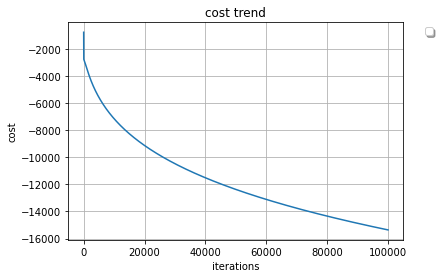

In [19]:
lr.run_model()

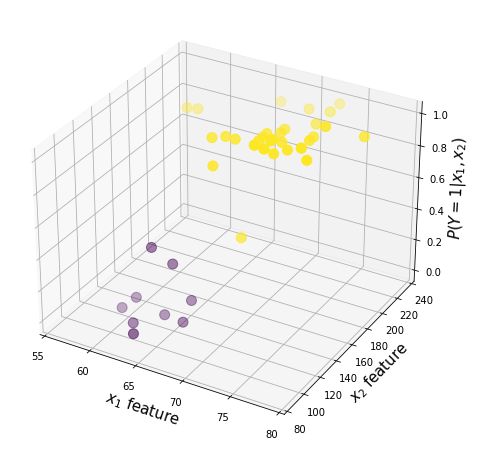

In [20]:
lr.plot()

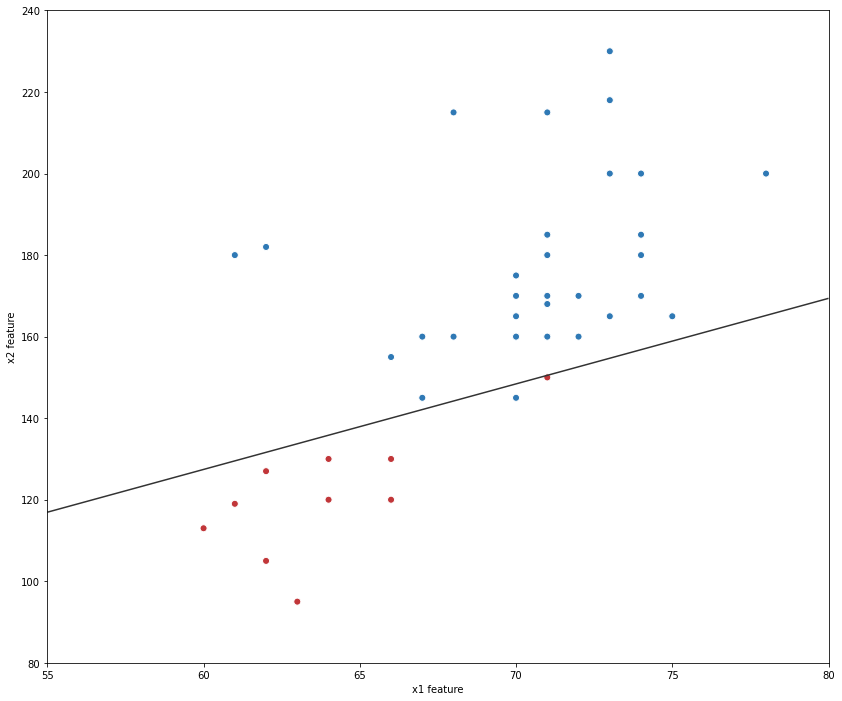

In [13]:
lr.scatterPlt()

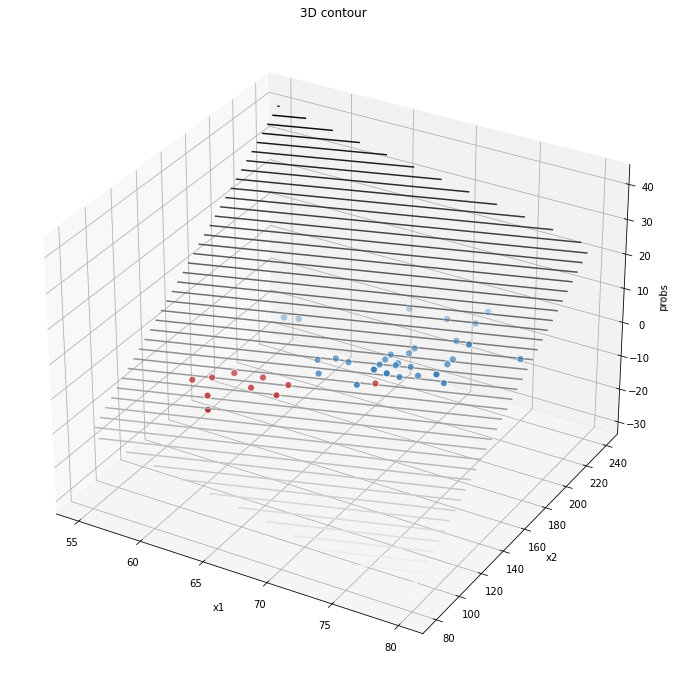

In [14]:
lr.plot3D()